In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats 
import itertools

### 1. Implementation:

Truth values of all of the messages in the three words.

In [2]:
all_ = {'w_all': 1, 'w_some': 0, 'w_no': 0}
some_ = {'w_all': 1, 'w_some': 1, 'w_no': 0}
no_ = {'w_all': 0, 'w_some': 0, 'w_no': 1}
notall_ = {'w_all': 0, 'w_some': 1, 'w_no': 1}

This is a helper dictionary that assigns the names of the words to the dictionaries that contain the truth values:

In [3]:
messages = {'all': all_, 'some': some_, 'no': no_, 'notall': notall_}

Probability of each message:

In [4]:
prob_message = {'all': 1/3, 'some': 2/3, 'no': 1/3, 'notall': 2/3}

This is the function that returns the probability of the world given the prior probability (p_0), the number of elements (n) and the world (world). 

In [4]:
def P(p_0, world, n):
    if world == 'w_all':
        return (p_0 ** n)
    elif world == 'w_no':
        return ((1 - p_0)**n)
    else:
        return (1 - (p_0 ** n + (1 - p_0)**n))

This is the function that calculates the probability of the message given the world (world), prior probability (p_0) and the number of items (n)

In [13]:
def get_prob_m(p_0, message, n):
    probs = []
    # for world in such worlds in which the message is true
    for w in [k for
              k,v in 
              messages.get(message).items() 
              if v == 1]:
        # get probability of the world
        probs.append(P(p_0, w, n))
    # return sum of the probabilties if true in more than one world
    return sum(probs)

In [14]:
get_prob_m(0.9, 'all', 10)

0.3486784401000001

In [15]:
def P_0(p_0, world, message, n):
    if messages.get(message).get(world) == 1:
        return P(p_0, world, n)/get_prob_m(p_0, message, n)
    else:
        # othervise return 0
        return 0

Below is the function that computes the utility of the message. Utility for each message is computed as follows:

$$log(P_0(w|message)) - cost(m)$$

In [16]:
def utility(message_c, message, world, p_0, n):
    return np.log(P_0(p_0, world, message, n)) - message_c.get(message)

Return the best message given the world:

In [17]:
def m(p_0, w, n, message_c):
    dic_res = {}
    for element in message_c.keys():
        dic_res[element] = utility(message_c=message_c, message=element, world=w, p_0=p_0, n=n)
    winner = max(dic_res, key=dic_res.get)
    return dic_res.get(winner)

The function below computes the following equation given the parameters for the Beta distribution representing the priors:

$$\sum_{P_0} P(P_0) \times (\sum_{w} P(w) \times U(m(P_0,M,w), w, P_0))$$

This function is designed to accept both parameters of the Beta distribution (a, b) as to produce a matrix of possible expected utility values given each combination of the parameters a and b. 

In [18]:
@np.vectorize
def expected_U(a, b, message_c, n=50):
    res = []
    for i in np.arange(0.01, 1, 0.01):
        utility = []
        for world in ['w_all', 'w_all', 'w_some']:
            utility.append(m(i, world, n, message_c) * P(i, world, n))
        res.append(scipy.stats.beta(a, b).pdf(i)*sum(utility))
    return(sum(res))

In [19]:
X = np.arange(0.01, 3, 0.1)
Y = np.arange(0.01, 3, 0.1)
X, Y = np.meshgrid(X, Y)

Let's fix the number of elements at 10, 50 and 100:

In [30]:
Z_10 = expected_U(X, Y, message_c={'all': 0, 'some': 0, 'no':0, 'notall': 1}, n=10)
Z_50 = expected_U(X, Y, message_c={'all': 0, 'some': 0, 'no':0, 'notall': 1}, n=50)
Z_100 = expected_U(X, Y, message_c={'all': 0, 'some': 0, 'no':0, 'notall': 1}, n=100)

<ipython-input-16-b267681f483b>:2: RuntimeWarning: divide by zero encountered in log
  return np.log(P_0(p_0, world, message, n)) - message_c.get(message)


This is just a helper function to plot the distribution of the expected utility values given a and b:

In [24]:
def plot_U(X, Y, Z, name, cmap='binary'):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap=cmap, edgecolor='none', alpha=0.5)
    ax.grid(False)
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Beta')
    ax.set_zlabel('Expected utility')
    plt.savefig(name, 
                bbox_inches = 'tight', 
                pad_inches = 0)

### 2. Experiments:

#### 2.1. Expected uitility in relation to the number of items:

Expected utility plots for the 10, 50 and 100 number of items, respectively:

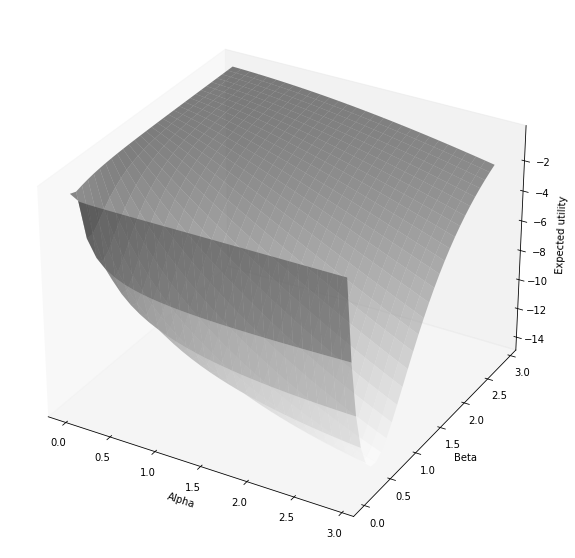

In [31]:
plot_U(X, Y, Z_10, '10.png')

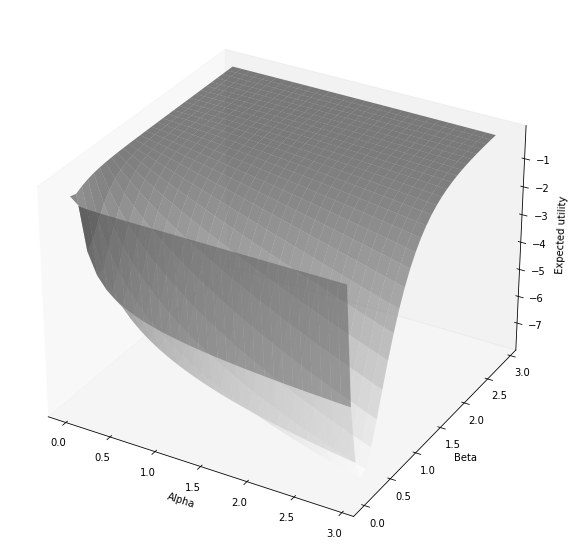

In [32]:
plot_U(X, Y, Z_50, '50.png')

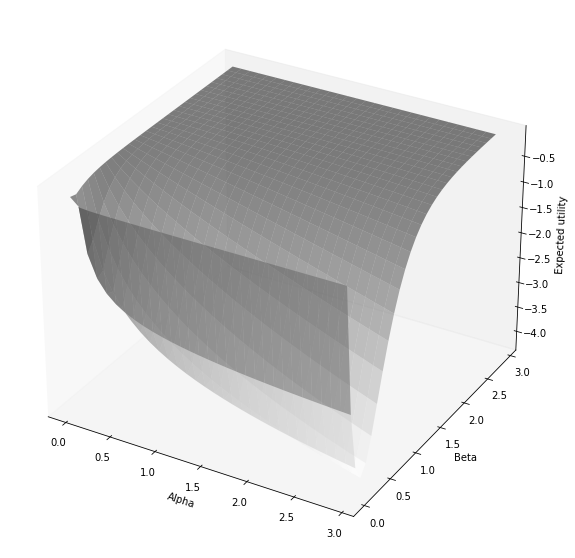

In [33]:
plot_U(X, Y, Z_100, '100.png')

Absolute difference in-between 100 and 10 items model:

In [34]:
plot_U(X, Y, abs(Z_100-Z_10))

TypeError: plot_U() missing 1 required positional argument: 'name'

#### 2.2. Expected uitility in relation to different languages:

In [22]:
Z_notall = expected_U(X, Y, message_c={'all': 0, 'some': 0, 'no':0, 'notall': 1}, n=10)
Z_some = expected_U(X, Y, message_c={'all': 0, 'some': 1, 'no':0, 'notall': 0}, n=10)

<ipython-input-16-b267681f483b>:2: RuntimeWarning: divide by zero encountered in log
  return np.log(P_0(p_0, world, message, n)) - message_c.get(message)


What is the difference between the language that does not lexicalize notall vs. the language that does not lexicalize some and notall?

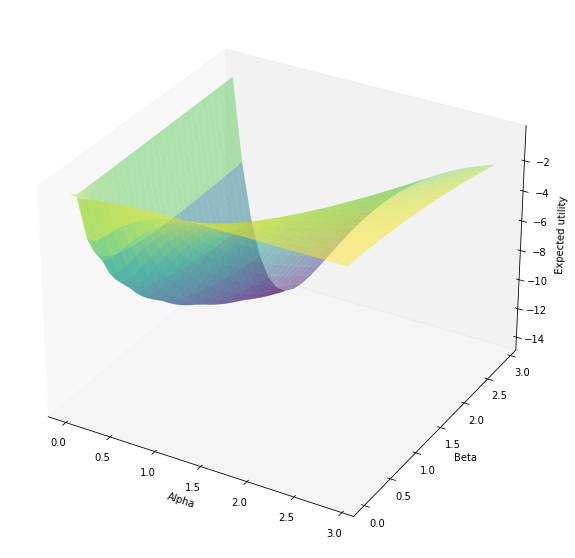

In [25]:
plot_U(X, Y, Z_some, cmap='viridis', name='some.pdf')

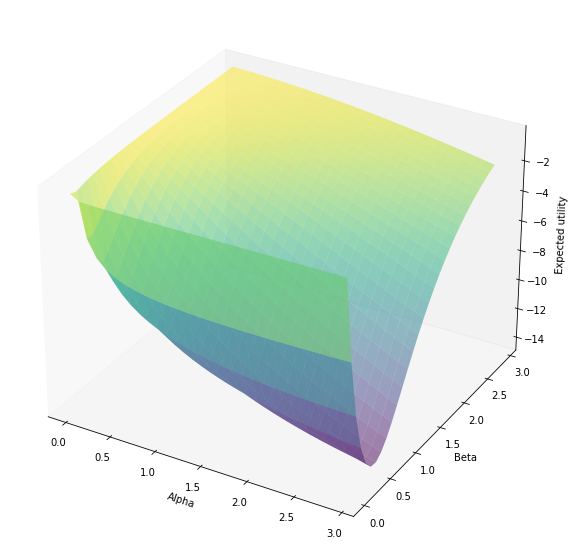

In [26]:
plot_U(X, Y, Z_notall, cmap='viridis', name='notall.pdf')

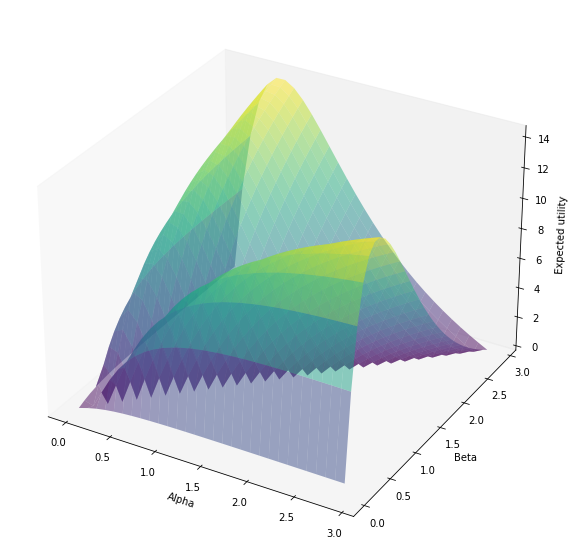

In [27]:
plot_U(X, Y, abs(Z_some-Z_notall), cmap='viridis', name='notall_some_diff.pdf')

In [28]:
(Z_notall == Z_some).all()

False